In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warinings
from tensorflow import keras
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f'The shape of the training data is {x_train.shape}')
print(f'The dimensions of each image is {x_train.shape[1:]}')
print(f'The train set contains {len(x_train)} images')
print(f'The test set contains {len(x_test)} images')

The shape of the training data is (60000, 28, 28)
The dimensions of each image is (28, 28)
The train set contains 60000 images
The test set contains 10000 images


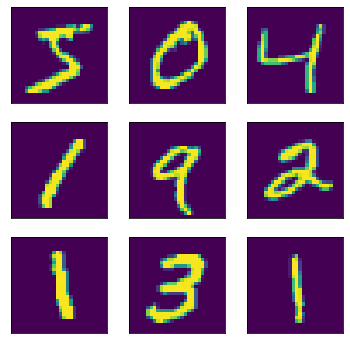

In [4]:
# Display sample input images
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    ax.axes.yaxis.set_ticks([])
    ax.axes.xaxis.set_ticks([])
    ax.imshow(x_train[i])
    

In [5]:
# Create a simple classifier
model = keras.Sequential([
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
# Prep the data
x_train = x_train.reshape((60000, 28*28)).astype("float32") / 255
x_test = x_test.reshape((10000, 28*28)).astype("float32") / 255

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2684 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0696 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9862
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0358 - accuracy: 0.9897


In [9]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [10]:
print(f'Predictions: {list(map(lambda z: z.argmax(), y_pred[:5]))}')
print(f'True Values: {list(y_test[:5])}')

Predictions: [7, 2, 1, 0, 4]
True Values: [7, 2, 1, 0, 4]


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'The test loss is: {test_loss}')
print(f'The test accuracy is: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9800
The test loss is: 0.06550806760787964
The test accuracy is: 0.9800000190734863
